In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import matplotlib.lines as mlines
%matplotlib inline

In [2]:
df_data = pd.read_excel('./optimalGrowthCurve.xlsx', skiprows=[0])
df_resp = df_data.loc[14:23,:].copy()
df_ferm = df_data.loc[33:44,:].copy()
df_mmod = df_data.loc[50:,:]

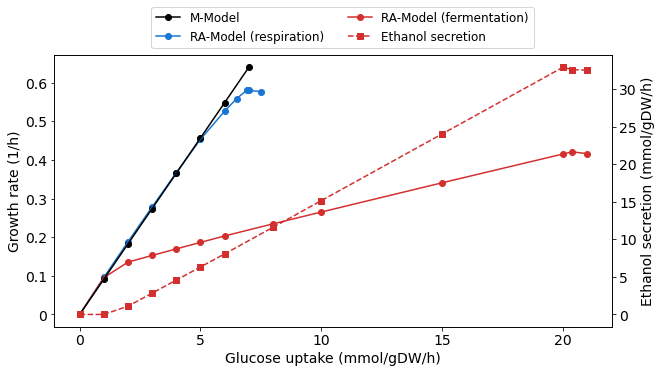

In [3]:
x1 = [0] + df_resp.glucose.to_list()
y1 = [0] + df_resp.mu_max.to_list()

x2 = [0] + df_ferm.glucose.to_list()
y2 = [0] + df_ferm.mu_max.to_list()
y2_2 = [0] + df_ferm.ethanol.to_list()

x3 = [0] + df_mmod.glucose.to_list()
y3 = [0] + df_mmod.mu_max.to_list()

fig,ax = plt.subplots(figsize=(10,5))

ax.scatter(x1, y1, c='#1976d2');
ax.plot(x1, y1, c='#1976d2');

ax.scatter(x2, y2, c='#d32f2f');
ax.plot(x2, y2, c='#d32f2f');

ax.scatter(x3, y3, c='k');
ax.plot(x3, y3, c='k');

ax2 = ax.twinx()
ax2.scatter(x2, y2_2, c='#d32f2f', marker='s');
ax2.plot(x2, y2_2, c='#d32f2f', linestyle='--');

ax.set_xticks([0,5,10,15,20])
ax.set_xticklabels([0,5,10,15,20], fontsize=14);
ax.set_xlabel('Glucose uptake (mmol/gDW/h)', fontsize=14);

ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]);
ax.set_yticklabels([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6], fontsize=14);
ax.set_ylabel('Growth rate (1/h)', fontsize=14);

ax2.set_yticks([0,5,10,15,20,25,30]);
ax2.set_yticklabels([0,5,10,15,20,25,30], fontsize=14);
ax2.set_ylabel('Ethanol secretion (mmol/gDW/h)', fontsize=14);

handles = [mlines.Line2D([], [], color='#000000', marker='o'),
           mlines.Line2D([], [], color='#1976d2', marker='o'),
           mlines.Line2D([], [], color='#d32f2f', marker='o'),
           mlines.Line2D([], [], color='#d32f2f', marker='s', ls='--')]
legend_labels = ['M-Model', 'RA-Model (respiration)', 'RA-Model (fermentation)',
                 'Ethanol secretion']
ax.legend(handles, legend_labels, ncol=2, bbox_to_anchor=(0.87,1.2), fontsize=12);

plt.savefig('./prelim_proteome_limit.png', transparent=True, bbox_inches='tight')